# Figure - study location

This notebook shows the study location within Europe.

#### Import statements

In [1]:
from matplotlib import pyplot
%matplotlib inline

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from imageio import imread

from urllib.request import urlretrieve
from zipfile import ZipFile
from os import path
from shutil import rmtree
from os import remove

In [2]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Helvetica',
                               'Arial',
                               'Bitstream Vera Sans',
                               'DejaVu Sans',
                               'Lucida Grande',
                               'Verdana',
                               'Geneva',
                               'Lucid',
                               'Avant Garde',
                               'sans-serif']

#### Variable declarations

Innsbruck coordinates

In [3]:
innsbruck_lon, innsbruck_lat = 11.3973, 47.2729

#### Download terrain data

In [4]:
terrain_url = r'http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/raster/GRAY_50M_SR_W.zip'
filepath, message = urlretrieve(terrain_url, filename=path.basename(terrain_url))
terrain_zip = ZipFile(path.basename(terrain_url))
terrain_zip.extractall()

#### Read terrain data as image

In [5]:
hillshade = imread("./GRAY_50M_SR_W/GRAY_50M_SR_W.tif")
# makes oceans white
hillshade[hillshade == 106] = 255

#### Delete downloaded files

In [6]:
remove("./GRAY_50M_SR_W.zip")
rmtree("./GRAY_50M_SR_W/")

#### Figure

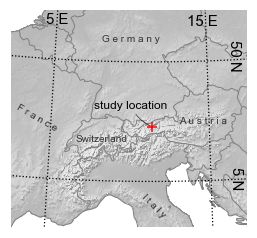

In [7]:
# define width and height of figure
height = (9.21 / 30) * 7
width = (6.85 / 20) * 7

# create figure
fig = pyplot.Figure()
fig.subplots_adjust(left=0, bottom=0, right=0.9, top=0.9, wspace=0, hspace=0)
fig.set_figheight(height)
fig.set_figwidth(width)
ax = pyplot.subplot(1, 1, 1, 
                    projection=ccrs.AlbersEqualArea(central_latitude=innsbruck_lat,
                                                    central_longitude=innsbruck_lon))

# create a feature for boundaries from Natural Earth Data
boundaries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='50m')
ax.add_feature(boundaries, edgecolor='gray', facecolor='none')

# add coastlines
ax.set_extent([3, 17, 43, 52])
ax.coastlines(resolution='50m', color='gray')

# add gridlines
gl =  ax.gridlines(xlocs=range(-5, 35, 10), ylocs=range(40, 60, 5), 
             crs=ccrs.PlateCarree(), 
             linestyle=':',
             linewidth=1.25,
             color='black')

# add lat-lon labels
label_05E = ax.text(5, 51.7, '5 E', size=15, ha='center', va='center', transform=ccrs.Geodetic())
label_15E = ax.text(14.9, 51.7, '15 E ', size=15, ha='center', va='center', transform=ccrs.Geodetic())
label_50N = ax.text(16.75, 50.1, '50 N ', size=15, ha='center', va='center', rotation=270, transform=ccrs.Geodetic())
label_45N = ax.text(16.5, 45.05, '5 N', size=15, ha='center', va='center', rotation=270,  transform=ccrs.Geodetic())

# add terrain hillshade
hillshade_extent = [-180, 180, -90, 90]
ax.imshow(hillshade, extent=hillshade_extent, origin='upper', cmap='gray', alpha=0.5,
          transform=ccrs.PlateCarree())

# add study area point (Innsbruck)
ax.scatter(innsbruck_lon, innsbruck_lat, 100, color='red', marker='+',
            transform=ccrs.Geodetic(), zorder=10)

# add country labels
ax.outline_patch.set_visible(False)
label_austria = ax.text(14.6, 47.5, 'A u s t r i a', ha='center', va='center', transform=ccrs.Geodetic(), color='0.2', zorder=100)
label_germany = ax.text(10, 51, 'G e r m a n y', ha='center', va='center', transform=ccrs.Geodetic(), color='0.2')
label_france = ax.text(4.1, 47.5, 'F r a n c e', ha='center', va='center', rotation=330, transform=ccrs.Geodetic(), color='0.2')
label_italy = ax.text(11.5, 44, 'I t a l y', ha='center', va='center', rotation=315, transform=ccrs.Geodetic(), color='0.2')
label_switzerland = ax.text(8.25, 46.75, 'Switzerland', ha='center', va='center', transform=ccrs.Geodetic(), color='0.2')

ap = dict(arrowstyle='-', connectionstyle='arc3,rad=0.2', linewidth=0.5)
a1 = ax.annotate('study location', xy=(innsbruck_lon, innsbruck_lat), 
                 xytext=((innsbruck_lon - 100000), (innsbruck_lat + 100000)), 
                 ha='center', va='center', size=12, arrowprops=ap)